         HOUSEID       WTHHFIN     WTHHFIN5D     WTHHFIN2D  NUMADLT  HOMEOWN  \
0     9000013002   4621.758002      0.000000  13946.191168        2        1   
1     9000013016   2982.998407   3878.814279      0.000000        2        3   
2     9000013026   9979.573402  14700.796695      0.000000        1        3   
3     9000013039  10355.890735  13150.678996      0.000000        2        3   
4     9000013041   4926.862529   7061.357485      0.000000        1        1   
...          ...           ...           ...           ...      ...      ...   
7888  9000218013   8792.888034  11731.186218      0.000000        2        1   
7889  9000218021   2508.248447      0.000000  16373.594134        1        2   
7890  9000218034  12559.631900  17007.945486      0.000000        2        2   
7891  9000218036  76132.849334  94596.352132      0.000000        1        3   
7892  9000218040   9052.679669  11033.704405      0.000000        1        2   

      HOMETYPE  RAIL  CENSUS_D  CENSUS_

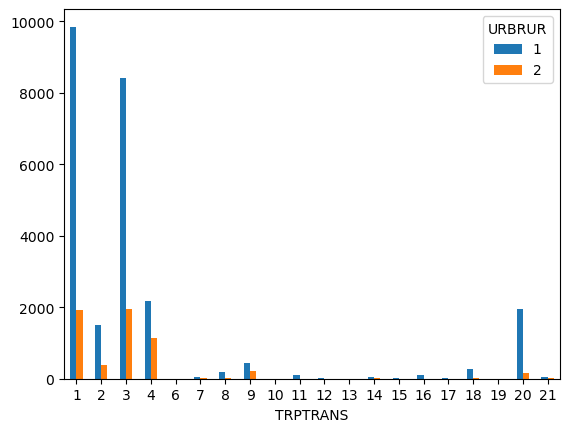

In [2]:
import pandas as pd
hhv = pd.read_csv("dataset/hhv2pub.csv")
ldtv = pd.read_csv("dataset/ldtv2pub.csv")
perv = pd.read_csv("dataset/perv2pub.csv")
tripv = pd.read_csv("dataset/tripv2pub.csv")
vehv = pd.read_csv("dataset/vehv2pub.csv")
print(hhv)


merged_df = pd.merge(vehv, hhv, on='HOUSEID')
print(merged_df.head())

# Creating crosstab
crosstb = pd.crosstab(tripv["TRPTRANS"], tripv["URBRUR"])
 
# Creating barplot
barplot = crosstb.plot.bar(rot=0)

print(tripv)

In [18]:
hhvurb = hhv[["HOUSEID","URBRUR"]]
triptransport = tripv[["HOUSEID", "HHFAMINC"]]
print(hhvurb)

         HOUSEID  URBRUR
0     9000013002       1
1     9000013016       1
2     9000013026       1
3     9000013039       1
4     9000013041       1
...          ...     ...
7888  9000218013       1
7889  9000218021       2
7890  9000218034       2
7891  9000218036       2
7892  9000218040       2

[7893 rows x 2 columns]


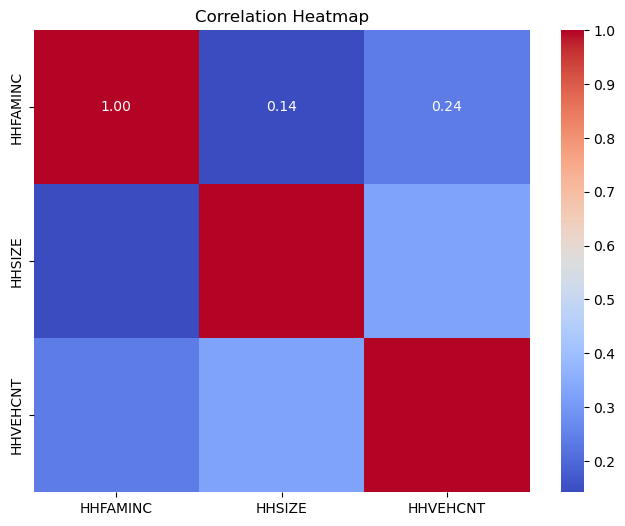

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file)
#df = pd.read_csv('your_dataset.csv')

# Compute the correlation matrix
corr = tripv[['HHFAMINC', 'HHSIZE', 'HHVEHCNT']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

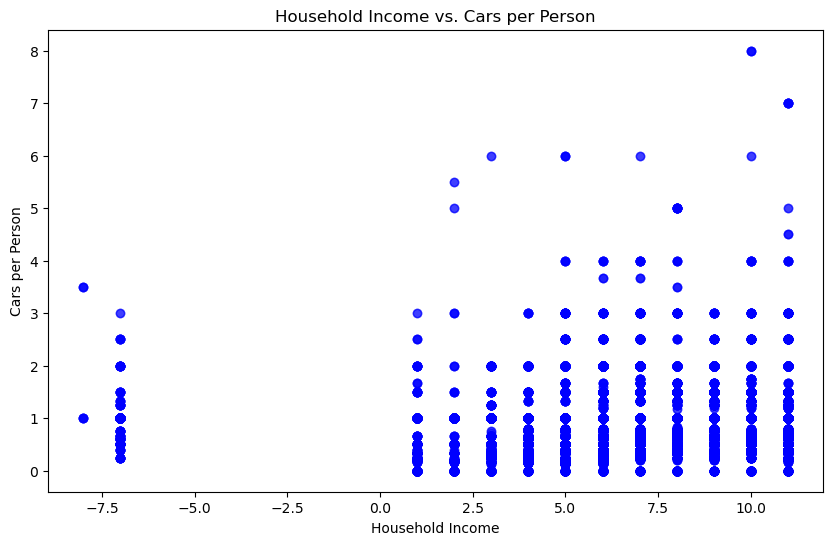

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with your actual file)
#df = pd.read_csv('your_dataset.csv')

# Calculate cars per person
tripv['cars_per_person'] = tripv['HHVEHCNT'] / tripv['HHSIZE']

# Drop rows where num_people is 0 (to avoid division by zero)
#df = df[df['num_people'] > 0]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(tripv['HHFAMINC'], tripv['cars_per_person'], alpha=0.5, c='blue')

# Label the axes
plt.xlabel('Household Income')
plt.ylabel('Cars per Person')


# Add a title
plt.title('Household Income vs. Cars per Person')

# Show the plot
plt.show()


      HOUSEID  PERSONID  TRIPID  SEQ_TRIPID     VEHCASEID  FRSTHM  PARK  \
0  9000013002         1       1           1  900001300201       1     2   
1  9000013002         1       2           2  900001300201       1     2   
2  9000013002         2       1           1  900001300202       1    -1   
3  9000013002         2       2           2  900001300202       1    -1   
4  9000013002         2       3           3  900001300202       1    -1   

   HHMEMDRV  TDWKND  TRAVDAY  ...  DRIVER  R_RACE  R_HISP  PROXY  EDUC  \
0         1       1        1  ...       1       1       2      1     7   
1         1       1        1  ...       1       1       2      1     7   
2         1       1        1  ...       1       1       2      2     7   
3         1       1        1  ...       1       1       2      2     7   
4         1       1        1  ...       1       1       2      2     7   

   PRMACT  R_SEX_IMP  VEHTYPE  HHFAMINC_IMP  cars_per_person  
0       3          2        3            

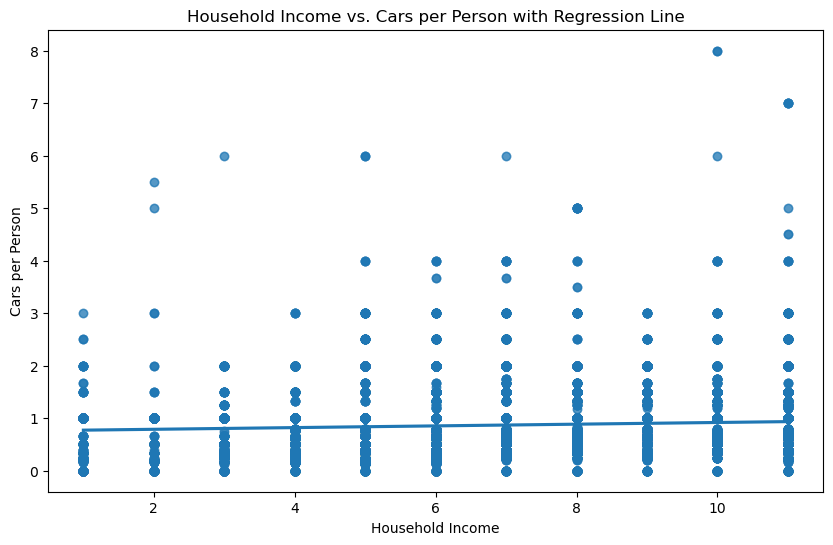

In [9]:
# Define a list of values to remove
values_to_remove = [-7, -8]  # Example: remove rows where income is 0 or 99999

# Use boolean indexing to exclude rows with these values
df_filtered = tripv[~tripv['HHFAMINC'].isin(values_to_remove)]

# Check the filtered DataFrame
print(df_filtered.head())

# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='HHFAMINC', y='cars_per_person', data=df_filtered, scatter_kws={'alpha':0.5})

# Label the axes
plt.xlabel('Household Income')
plt.ylabel('Cars per Person')

# Add a title
plt.title('Household Income vs. Cars per Person with Regression Line')

# Show the plot
plt.show()




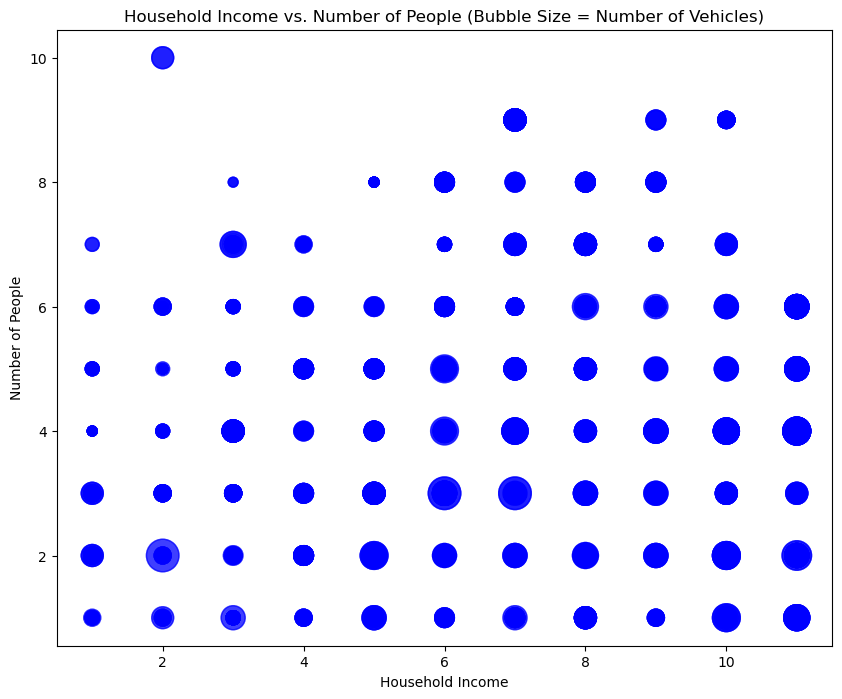

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file)
#df = pd.read_csv('your_dataset.csv')

# Create a bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(df_filtered['HHFAMINC'], df_filtered['HHSIZE'], s=df_filtered['HHVEHCNT']*50, alpha=0.5, c='blue')

# Label the axes
plt.xlabel('Household Income')
plt.ylabel('Number of People')

# Add a title
plt.title('Household Income vs. Number of People (Bubble Size = Number of Vehicles)')

# Show the plot
plt.show()

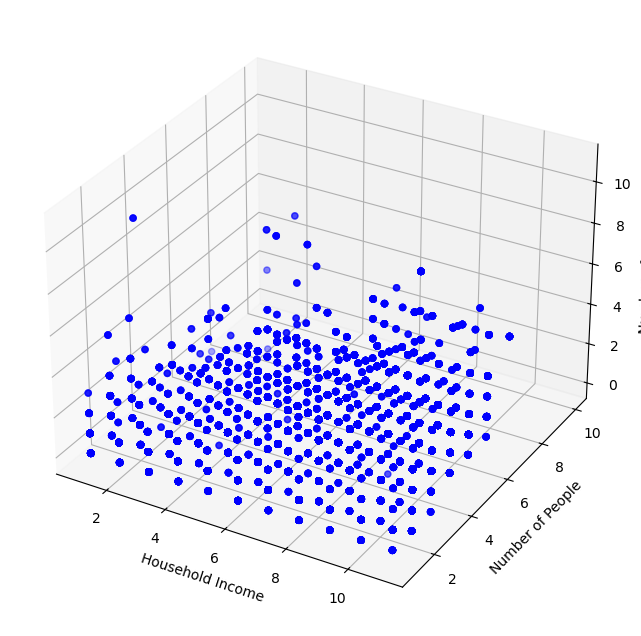

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset (replace 'your_dataset.csv' with your actual file)
#df = pd.read_csv('your_dataset.csv')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df_filtered['HHFAMINC'], df_filtered['HHSIZE'], df_filtered['HHVEHCNT'], c='blue', marker='o')

# Label the axes
ax.set_xlabel('Household Income')
ax.set_ylabel('Number of People')
ax.set_zlabel('Number of Vehicles')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
csv_file = '2022_Passenger_OD_Annual_Data.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file)

# Step 2: Extract the data for the pie chart
# Assuming the first column is the category and the second is the value
categories = df.iloc[:, 0]  # First column as categories
values = df.iloc[:, 1]      # Second column as values

# Step 3: Create the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the chart
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Breakdown of Categories')  # Add a title
plt.axis('equal')  # Ensure the pie chart is circular

# Step 4: Show the chart
plt.show()

In [18]:
inc_mapping_series = pd.Series({-7: r"I prefer not to answer",
                            -8: r"I don't know", 
                            1: r"01 - Less than \$10,000", 
                            2: r"02 - \$10,000 - \$14,999",
                            3: r"03 - \$15,000 - \$24,999",
                            4: r"04 - \$25,000 - \$34,999",
                            5: r"05 - \$35,000 - \$49,999",
                            6: r"06 - \$50,000 - \$74,999",
                            7: r"07 - \$75,000 - \$99,999",
                            8: r"08 - \$100,000 - \$124,999",
                            9: r"09 - \$125,000 - \$149,999",
                            10: r"10 - \$150,000 - \$199,999",
                            11: r"11 - \$200,000 or more"
                            })
tripv['HHFAMINC_label'] = tripv['HHFAMINC'].replace(inc_mapping_series)
#print(tripv)

trans_mapping_series = pd.Series({1: "Car", 
                            2: "Van",
                            3: "SUV/Crossover",
                            4: "Pickup truck",

                            6: "Recreational Vehicle",
                            7: "Motorcycle",
                            8: "Public or commuter bus",
                            9: "School bus",
                            10: "Street car or trolley car",
                            11: "Subway or elevated rail",
                            12: "Commuter rail",
                            13: "Amtrak",
                            14: "Airplane",
                            15: "Taxicab or limo service",
                            16: "Other ride-sharing service",
                            17: "Paratransit/ Dial a ride",
                            18: "Bicycle (including bikeshare, ebike, etc.)",
                            19: "E-scooter",
                            20: "Walked",
                            21: "Other (specify)"
                            })
tripv['TRPTRANS_label'] = tripv['TRPTRANS'].replace(trans_mapping_series)


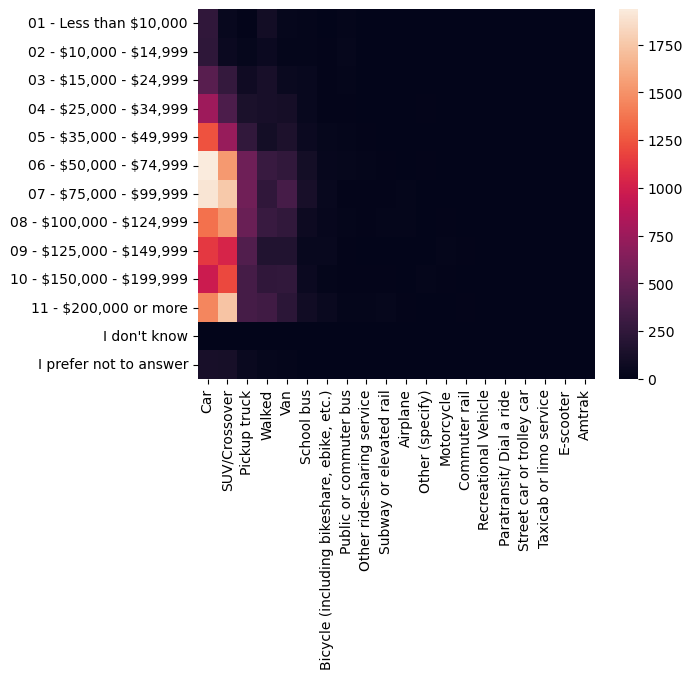

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
# Creating crosstab
crosstb = pd.crosstab(tripv.HHFAMINC_label, tripv.TRPTRANS_label).sort_index(axis = 0)
crosstb_ord = crosstb[crosstb.sum().sort_values(ascending=False).index]

# Heatmap
heatmap = sns.heatmap(crosstb_ord.rename_axis(index=None, columns=None))

In [20]:
import pandas as pd

hhv = pd.read_csv("dataset/hhv2pub.csv")
ldtv = pd.read_csv("dataset/ldtv2pub.csv")
perv = pd.read_csv("dataset/perv2pub.csv")
tripv = pd.read_csv("dataset/tripv2pub.csv")
vehv = pd.read_csv("dataset/vehv2pub.csv")

# Calculate the 'cars per drivers' column
hhv['cars_per_driver'] = hhv['HHVEHCNT'] / hhv['DRVRCNT']

# Define bins and labels
bins = [0, 1, 2, 3, 4, 5, np.inf]  # Use np.inf to capture all values >= 5
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']

# Bin the "cars_per_driver" column
hhv['cars_per_driver_bin'] = pd.cut(hhv['cars_per_driver'], bins=bins, labels=labels, include_lowest=True)

# Display the updated DataFrame
print(hhv.cars_per_driver_bin)


0       0-1
1       0-1
2       0-1
3       0-1
4       0-1
       ... 
7888    0-1
7889    0-1
7890    0-1
7891    NaN
7892    0-1
Name: cars_per_driver_bin, Length: 7893, dtype: category
Categories (6, object): ['0-1' < '1-2' < '2-3' < '3-4' < '4-5' < '5+']


In [23]:
inc_mapping_series = pd.Series({-7: r"I prefer not to answer",
                            -8: r"I don't know", 
                            1: r"01 - Less than \$10,000", 
                            2: r"02 - \$10,000 - \$14,999",
                            3: r"03 - \$15,000 - \$24,999",
                            4: r"04 - \$25,000 - \$34,999",
                            5: r"05 - \$35,000 - \$49,999",
                            6: r"06 - \$50,000 - \$74,999",
                            7: r"07 - \$75,000 - \$99,999",
                            8: r"08 - \$100,000 - \$124,999",
                            9: r"09 - \$125,000 - \$149,999",
                            10: r"10 - \$150,000 - \$199,999",
                            11: r"11 - \$200,000 or more"
                            })
hhv['HHFAMINC_label'] = hhv['HHFAMINC'].replace(inc_mapping_series)
#print(hhv)


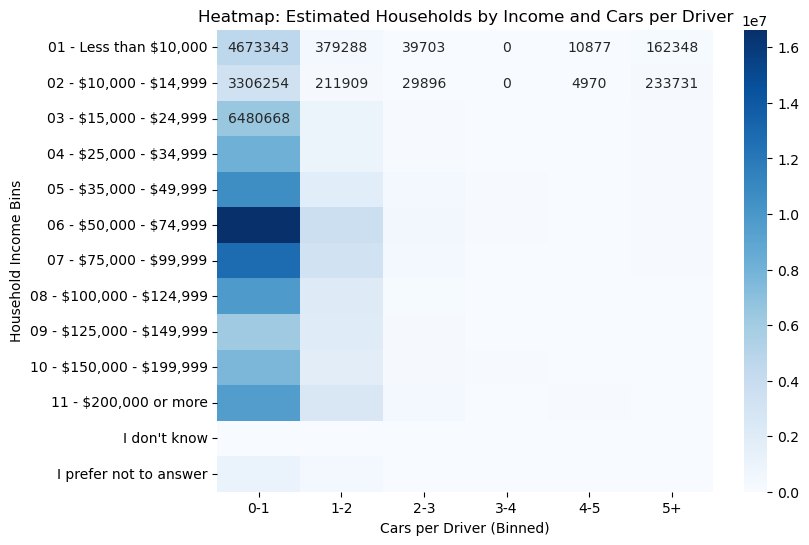

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table with weighted sums
pivot_table = hhv.pivot_table(
    index='HHFAMINC_label',  # Rows
    columns='cars_per_driver_bin',  # Columns
    values='WTHHFIN',  # Values to aggregate (the weight column)
    aggfunc='sum',  # Sum the weights
    fill_value=0  # Fill missing combinations with 0
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues', cbar=True)
plt.xlabel('Cars per Driver (Binned)')
plt.ylabel('Household Income Bins')
plt.title('Heatmap: Estimated Households by Income and Cars per Driver')
plt.show()

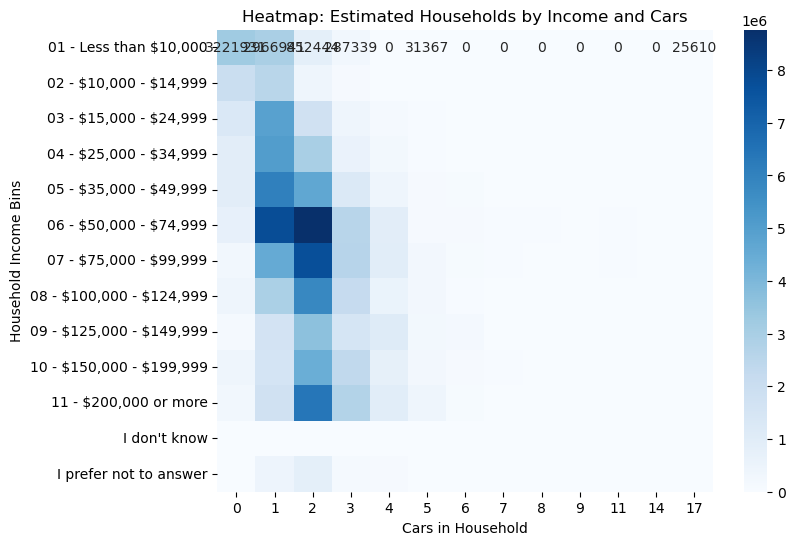

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table with weighted sums
pivot_table = hhv.pivot_table(
    index='HHFAMINC_label',  # Rows
    columns='HHVEHCNT',  # Columns
    values='WTHHFIN',  # Values to aggregate (the weight column)
    aggfunc='sum',  # Sum the weights
    fill_value=0  # Fill missing combinations with 0
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues', cbar=True)
plt.xlabel('Cars in Household')
plt.ylabel('Household Income Bins')
plt.title('Heatmap: Estimated Households by Income and Cars')
plt.show()